## Load data and libraries

In [1]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import geopandas as gp
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import folium 


In [2]:
# Directory where your CSV files are located
directory = '/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV'

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)  # Get the full file path
        # Read the CSV file and create a DataFrame with a variable name based on the filename (without extension)
        dataframe_name = os.path.splitext(filename)[0]  # Extract the filename without extension
        globals()[dataframe_name] = pd.read_csv(file_path)

# Now you have separate DataFrame variables named after the filenames (without extension)
# For example, if you have a file 'calendar.csv', you can access its DataFrame using 'calendar' variable
# Similarly, if you have a file 'listings.csv', you can access its DataFrame using 'listings' variable


In [3]:
#listing_2 = pd.read_csv('/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/listings-2.csv')

In [4]:
#listing_2.columns

In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
colums_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source','picture_url','host_url', 'host_thumbnail_url', 'host_picture_url','neighbourhood', 'neighbourhood_group_cleansed', 'latitude',
'longitude','bathrooms', 'amenities','calendar_updated','calendar_last_scraped']
listings = listings.drop(columns= colums_to_drop)

In [7]:
'''
# Find columns that are unique to df1
unique_to_df1 = listings.columns.difference(listing_2.columns)

# Find columns that are unique to df2
unique_to_df2 = listing_2.columns.difference(listings.columns)

# Print columns that are not present in both DataFrames
print("Columns unique to df1:", list(unique_to_df1))
print("Columns unique to df2:", list(unique_to_df2))
'''

'\n# Find columns that are unique to df1\nunique_to_df1 = listings.columns.difference(listing_2.columns)\n\n# Find columns that are unique to df2\nunique_to_df2 = listing_2.columns.difference(listings.columns)\n\n# Print columns that are not present in both DataFrames\nprint("Columns unique to df1:", list(unique_to_df1))\nprint("Columns unique to df2:", list(unique_to_df2))\n'

In [8]:
calendar.nunique()

listing_id        7029
date               366
available            2
price              920
adjusted_price       0
minimum_nights      68
maximum_nights     103
dtype: int64

In [9]:
#del neighbourhoods

## Clean Data

In [60]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            7029 non-null   int64         
 1   name                                          7029 non-null   object        
 2   neighborhood_overview                         2131 non-null   object        
 3   host_id                                       7029 non-null   int64         
 4   host_name                                     7029 non-null   object        
 5   host_since                                    7029 non-null   datetime64[ns]
 6   host_location                                 4593 non-null   object        
 7   host_about                                    4472 non-null   object        
 8   host_response_time                            6302 non-null   catego

In [11]:
listings.duplicated().sum()

0

In [12]:
listings.isnull().sum()#drop description & bedrooms & license, neighborhood overview & host about turn binomial, 

id                                                 0
name                                               0
description                                     7029
neighborhood_overview                           4898
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                   2436
host_about                                      2557
host_response_time                               727
host_response_rate                               727
host_acceptance_rate                             551
host_is_superhost                                 16
host_neighbourhood                               443
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                        

In [13]:
listings.isnull().all(axis = 1).sum()

0

In [14]:
listings = listings.drop(columns= ['description', 'bedrooms', 'license'])

In [15]:
#listings.drop(['description', 'bedrooms', 'license'], axis=1)

In [16]:
columms_to_date = listings[['host_since', 'first_review', 'last_review']]
listings[['host_since', 'first_review', 'last_review']] = listings[['host_since', 'first_review', 'last_review']].apply(pd.to_datetime)

In [17]:
columns_to_categorical = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability', 'instant_bookable','host_response_time','room_type' ]
listings[columns_to_categorical] = listings[columns_to_categorical].astype('category')

In [18]:
listings['bathrooms'] = listings['bathrooms_text'].str.extract(r'(\d+(?:\.\d+)?)')

In [19]:
del listings['bathrooms_text']

In [20]:
listings['price'].unique()

array([nan, '$482.00', '$1,475.00', ..., '$1,883.00', '$1,654.00',
       '$126.00'], dtype=object)

In [21]:
listings['price'] = listings['price'].str.replace('$','').str.replace(',','')
columns_to_int = ['price','bathrooms']
listings[columns_to_int] = listings[columns_to_int].astype('float')

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_54771/101578773.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$','').str.replace(',','')


In [22]:
print(listings['host_response_time'].unique())
print(listings['room_type'].unique())

[NaN, 'within an hour', 'a few days or more', 'within a few hours', 'within a day']
Categories (4, object): ['a few days or more', 'within a day', 'within a few hours', 'within an hour']
['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']


In [23]:
percentage_columns = ['host_response_rate', 'host_acceptance_rate']
listings[percentage_columns] = listings[percentage_columns].replace('%', '', regex=True).astype('float')/100

## EDA

### Cloud Word 

### Continuous variables

<Axes: xlabel='price', ylabel='Count'>

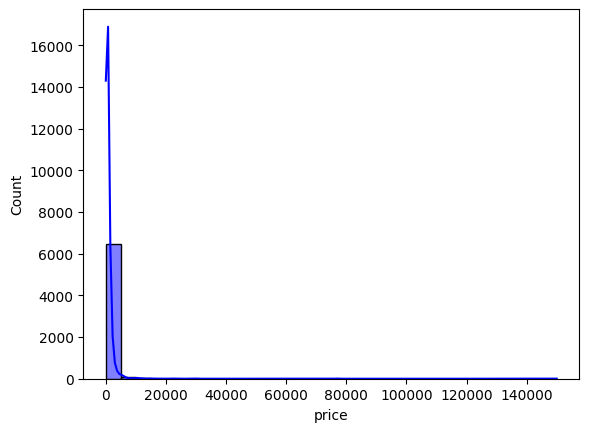

In [24]:
sns.histplot(listings['price'], kde=True, color='blue', bins=30)

<Axes: xlabel='price'>

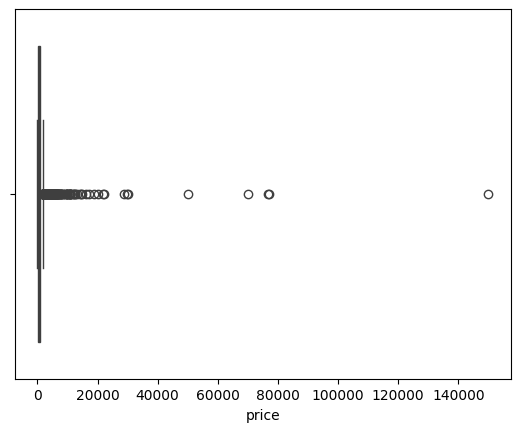

In [25]:
sns.boxplot(x=listings['price'])

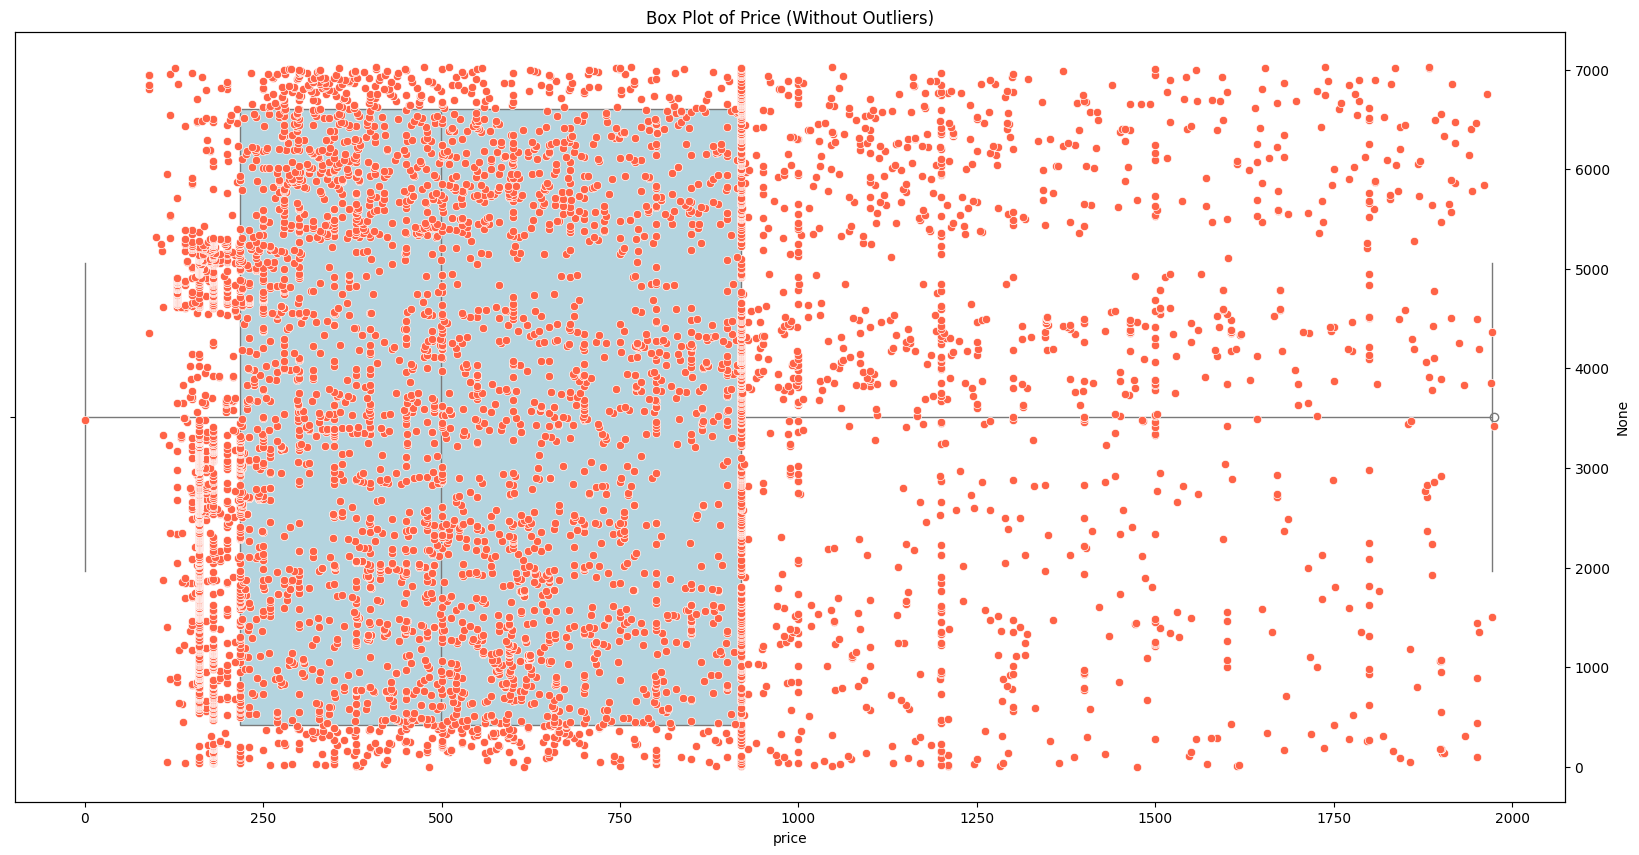

In [26]:
# Calculate quartiles
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define upper bound
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with values within the top quartile
listings['price'] = listings['price'].apply(lambda x: Q3 if x > upper_bound else x)

# Plot box plot of the updated "price" variable
plt.figure(figsize=(20, 10))
sns.boxplot(x=listings['price'], color='lightblue')
scatter_ax = plt.gca().twinx()  # Create a new set of y-axes sharing the same x-axis
sns.scatterplot(x=listings['price'], y=listings.index, color='tomato', ax=scatter_ax)
plt.title('Box Plot of Price (Without Outliers)')
plt.xlabel('Price')
plt.show()


In [27]:
correlation_matrix = listings.corr()

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_54771/2347189904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = listings.corr()


In [28]:
correlation_matrix['price']



id                                              0.136893
host_id                                         0.035430
host_response_rate                             -0.110897
host_acceptance_rate                            0.392430
host_listings_count                            -0.454239
host_total_listings_count                      -0.377667
accommodates                                    0.494169
beds                                            0.267948
price                                           1.000000
minimum_nights                                 -0.167536
maximum_nights                                 -0.214367
minimum_minimum_nights                         -0.173033
maximum_minimum_nights                         -0.036791
minimum_maximum_nights                         -0.153076
maximum_maximum_nights                         -0.156134
minimum_nights_avg_ntm                         -0.043018
maximum_nights_avg_ntm                         -0.152924
availability_30                

<Axes: >

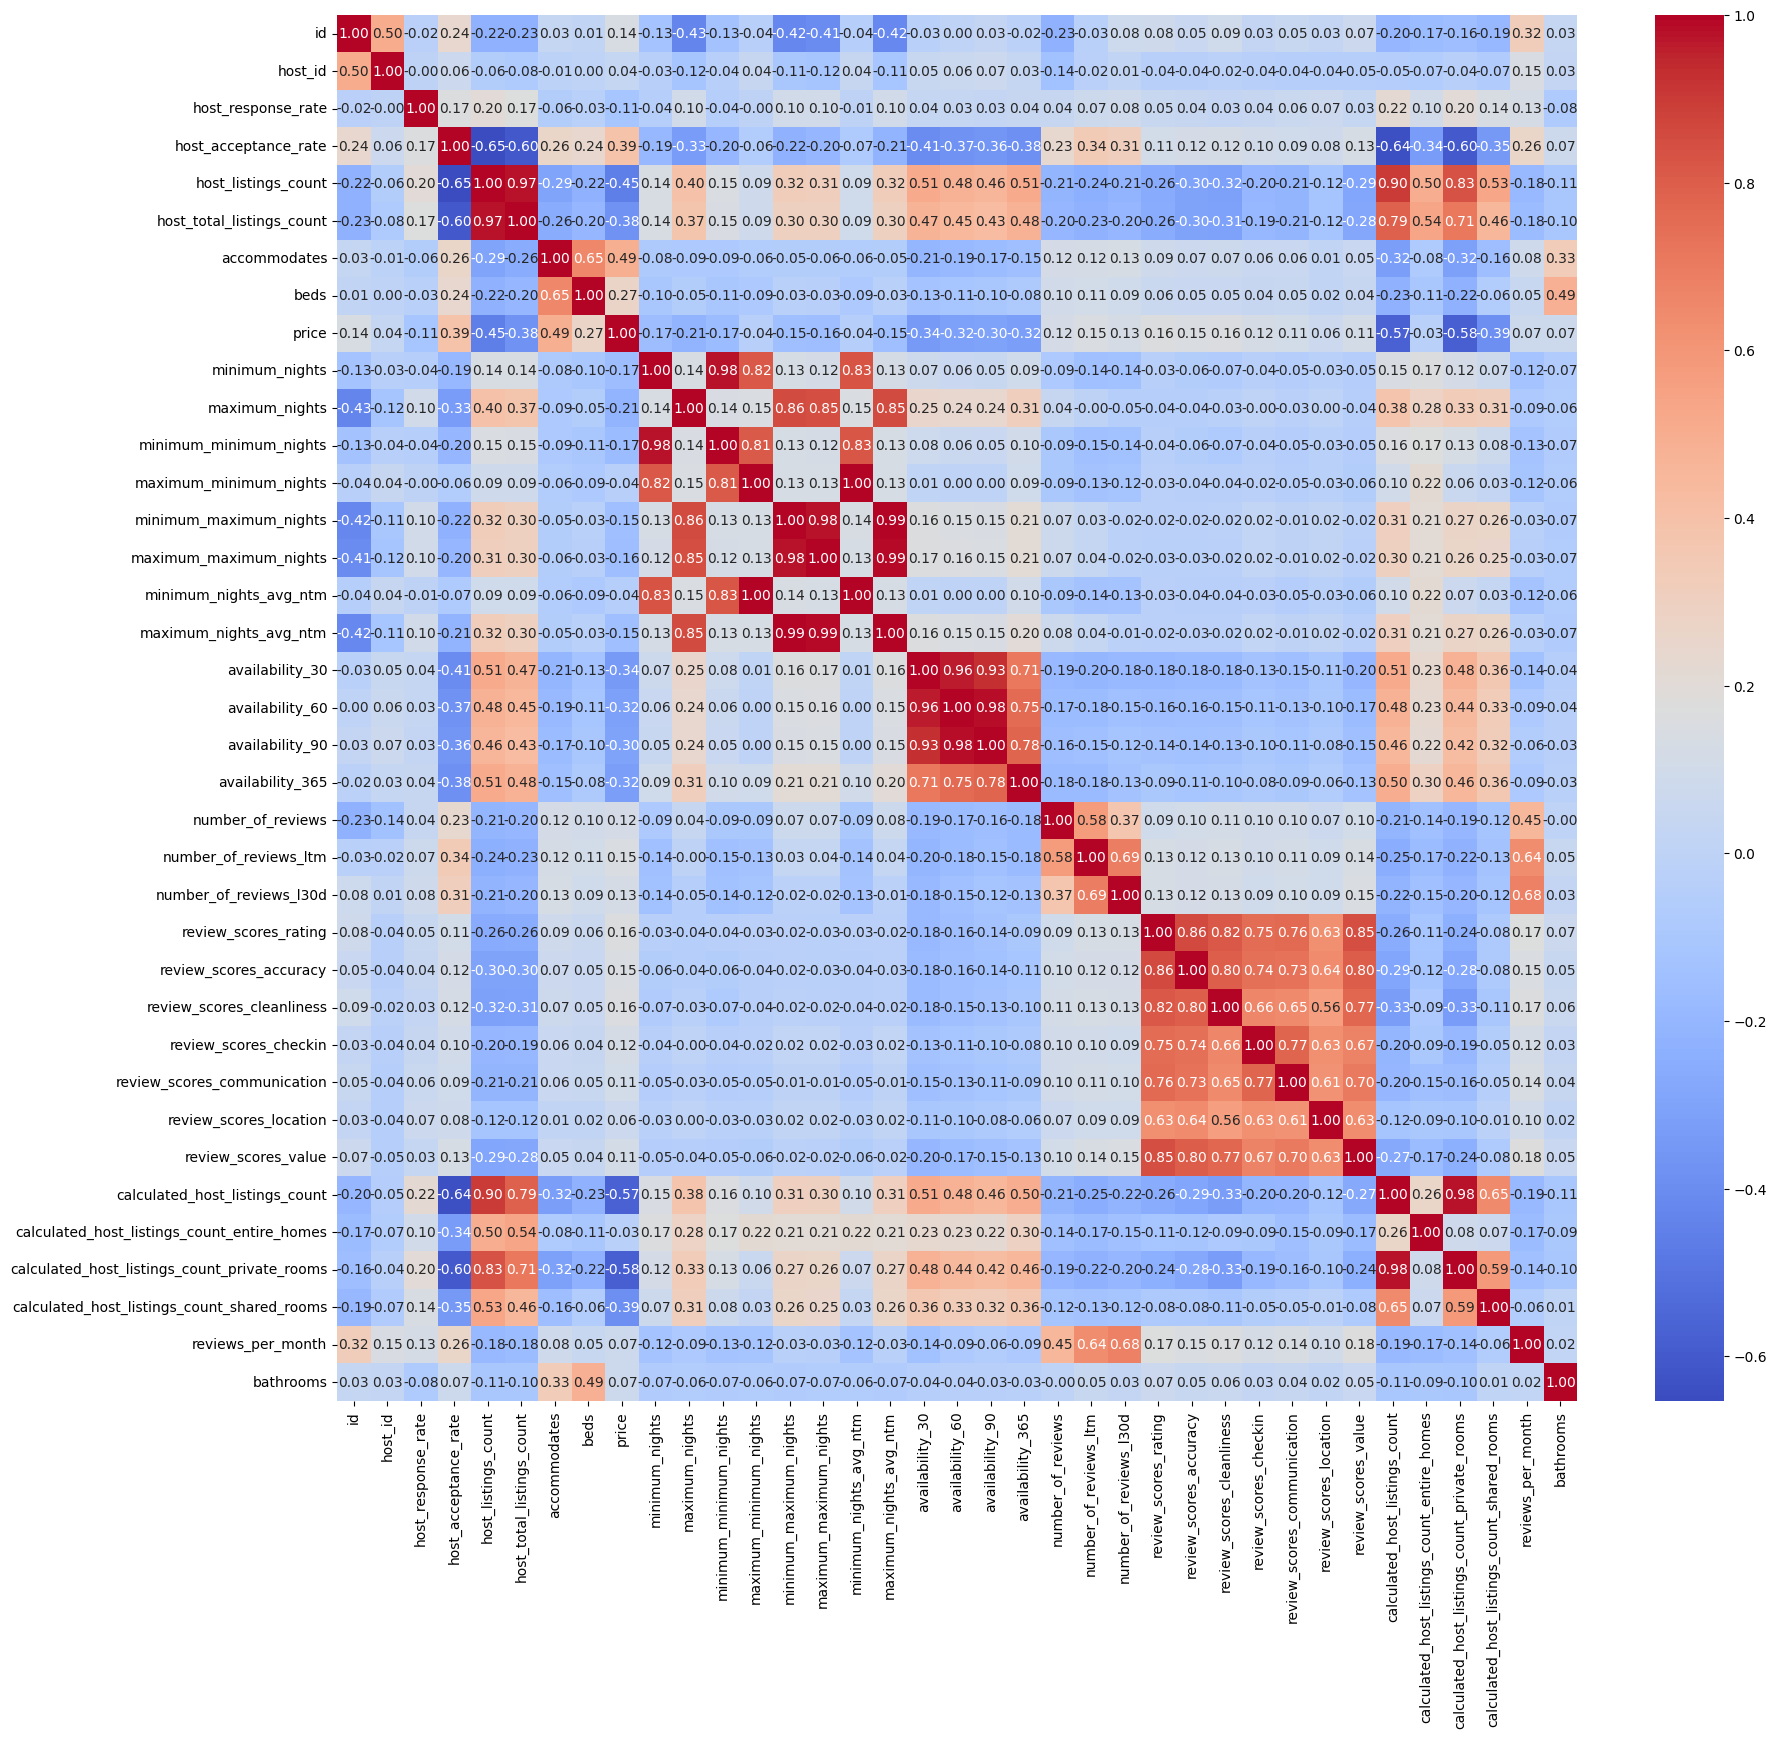

In [29]:
num_columns = listings.select_dtypes(include=['number'])
num_columns.corr('spearman')
plt.figure(figsize=(20, 18))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

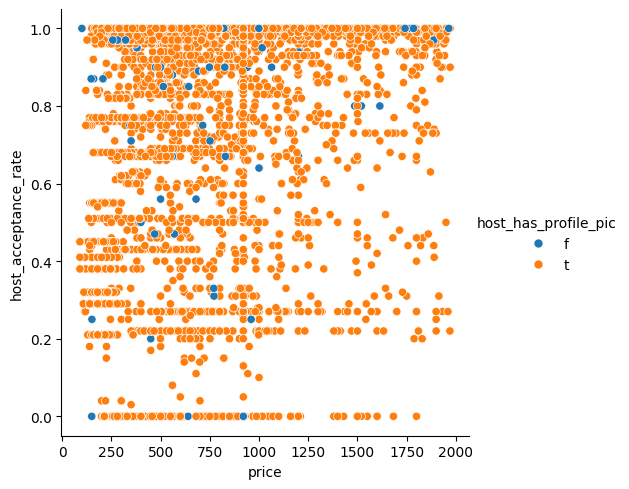

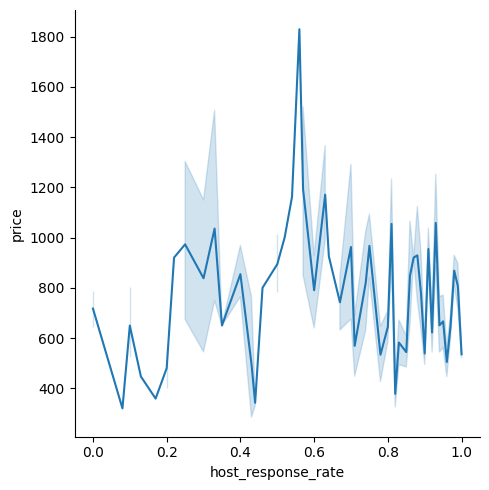

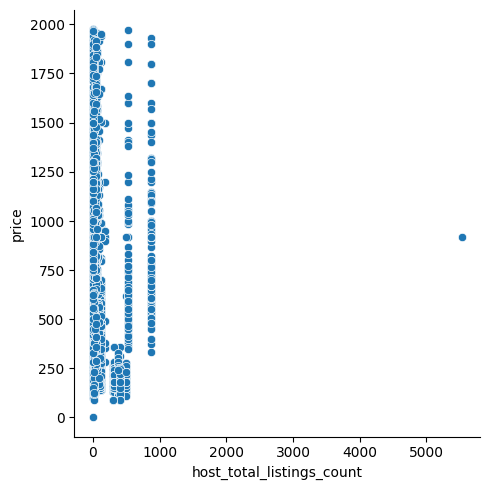

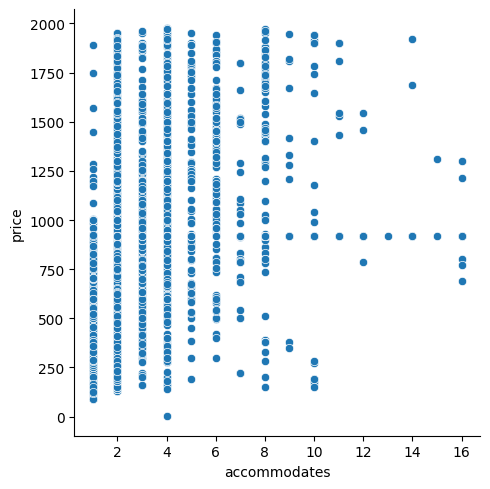

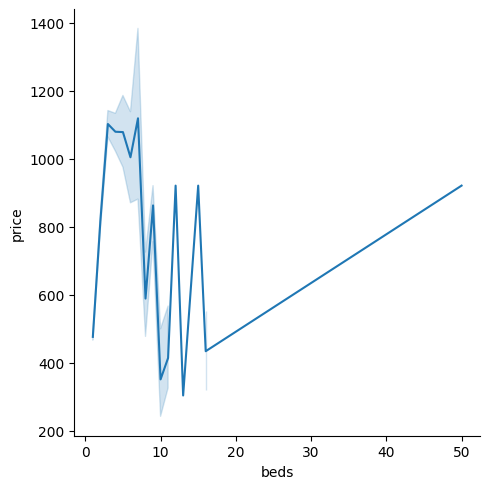

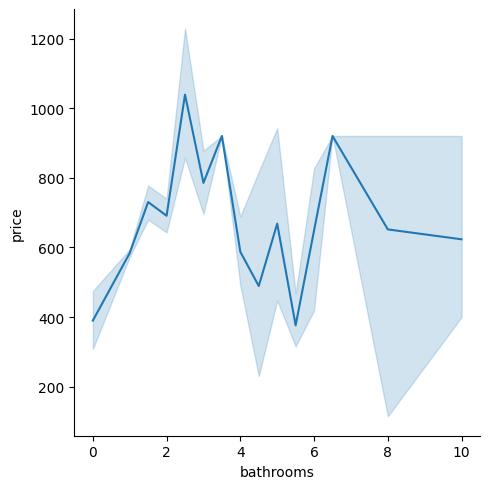

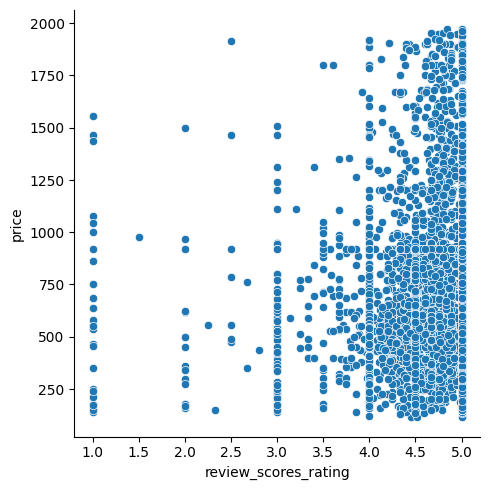

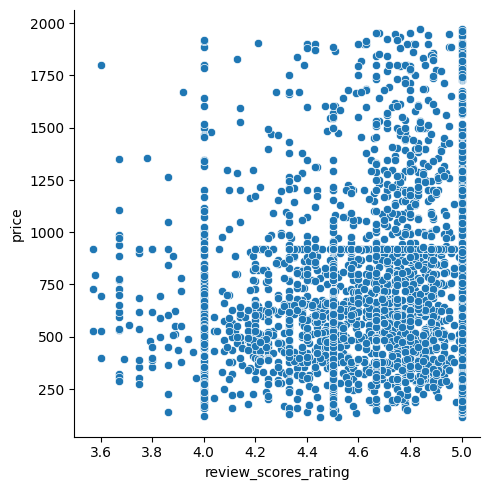

In [49]:
sns.relplot(data=listings, x="price", y="host_acceptance_rate", hue='host_has_profile_pic')
print(sns.relplot(data=listings, x="host_response_rate", y="price", kind='line'))
print(sns.relplot(data=listings, x="host_total_listings_count", y="price"))
print(sns.relplot(data=listings, x="accommodates", y="price"))
print(sns.relplot(data=listings, x="beds", y="price", kind='line'))
print(sns.relplot(data=listings, x="bathrooms", y="price", kind='line'))
print(sns.relplot(data=listings, x="review_scores_rating", y="price"))
filter = listings[listings['review_scores_rating'] > 3.5]
print(sns.relplot(data=filter, x="review_scores_rating", y="price"))

In [57]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['[0,1]', '[1,2]', '[2,3]','[3,4]','[4,5]']
listings['rating_range'] = pd.cut(listings['review_scores_rating'], bins=bins, labels=labels, right=False)

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_54771/3059331406.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=listings, x='rating_range', y='price', ci=None, color='skyblue')


<Axes: xlabel='rating_range', ylabel='price'>

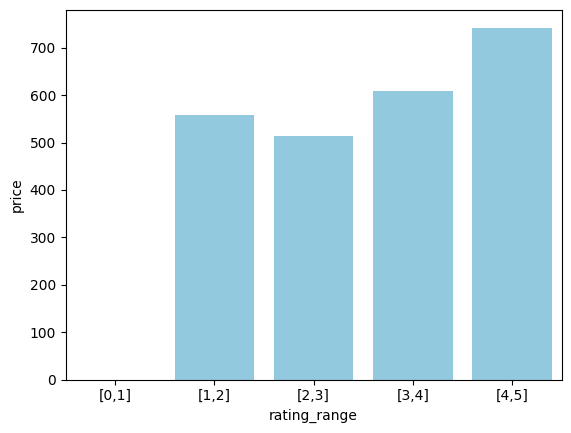

In [61]:
sns.barplot(data=listings, x='rating_range', y='price', ci=None, color='skyblue')

Axes(0.125,0.11;0.775x0.77)


/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_54771/3588707773.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  print(sns.barplot(data=listings, x='accommodates', y='price', ci=None, color='skyblue'))


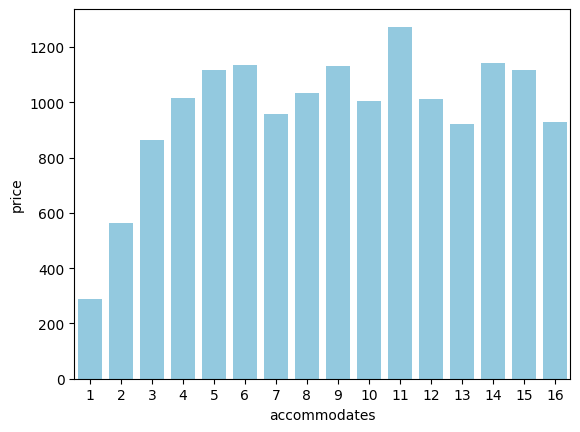

In [53]:
print(sns.barplot(data=listings, x='accommodates', y='price', ci=None, color='skyblue'))
#are there groups? 6 to 9 or maybe I can group them together and create ranges? 


### Categorical variables

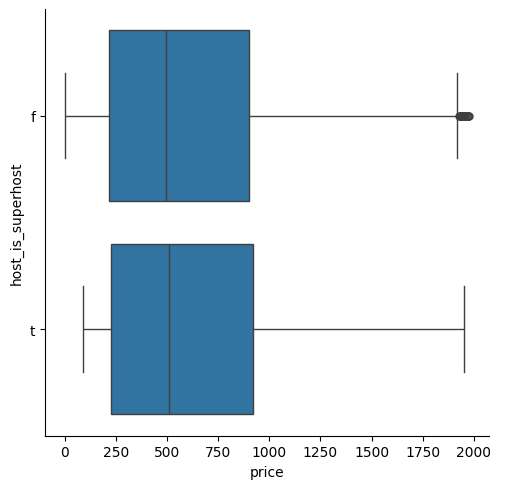

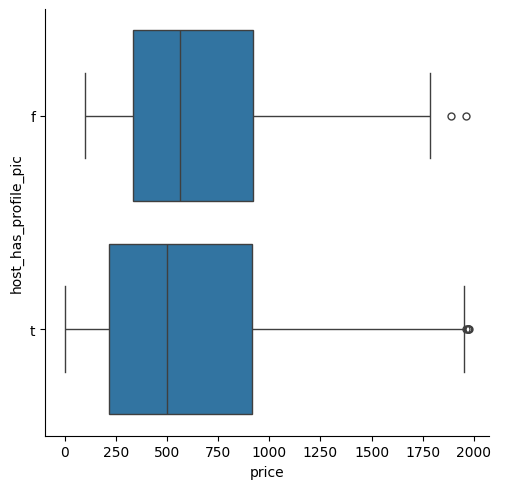

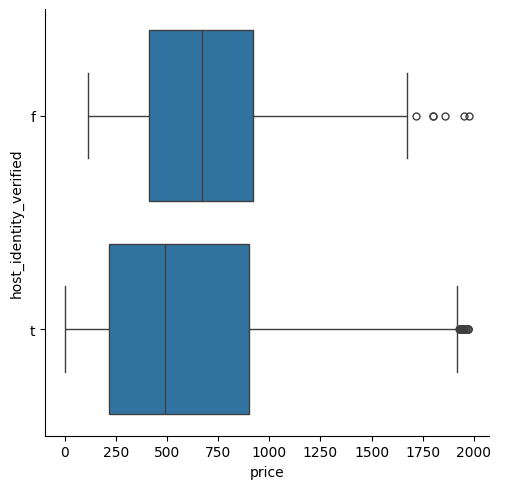

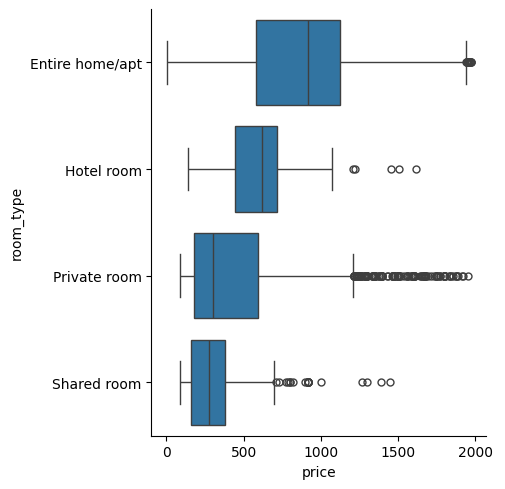

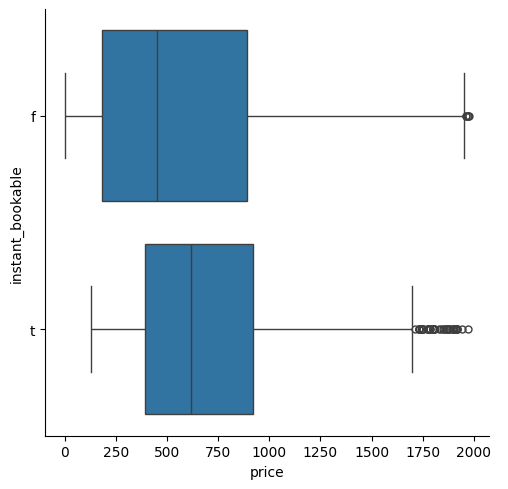

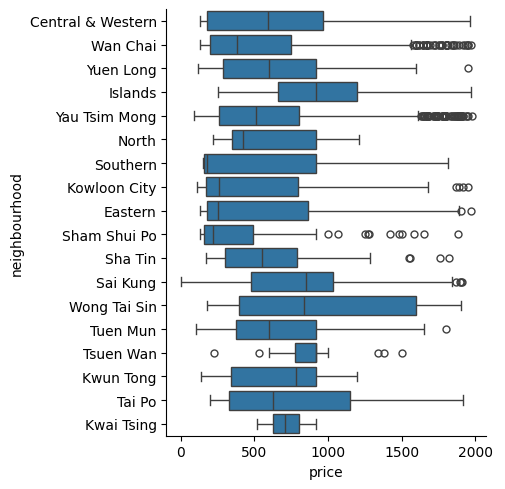

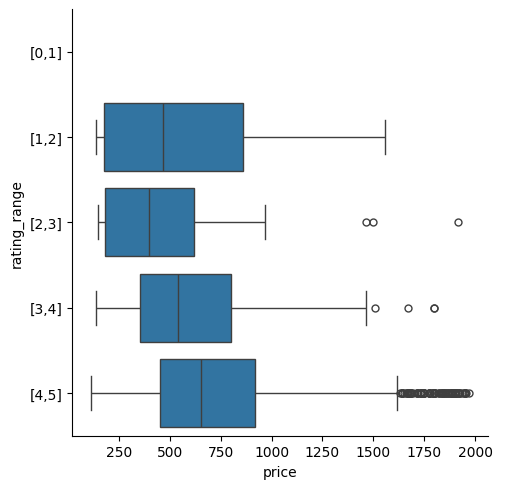

In [62]:
sns.catplot(data=listings, x="price", y="host_is_superhost", kind="box")
print(sns.catplot(data=listings, x="price", y="host_has_profile_pic", kind="box"))
print(sns.catplot(data=listings, x="price", y="host_identity_verified", kind="box"))
print(sns.catplot(data=listings, x="price", y="room_type", kind="box"))
print(sns.catplot(data=listings, x="price", y="instant_bookable", kind="box"))
print(sns.catplot(data=listings, x="price", y="neighbourhood", kind="box"))
print(sns.catplot(data=listings, x="price", y="rating_range", kind="box"))

### A/B Testing

In [33]:
#would you def a function for something like this?

In [34]:
shapiro(listings['price'])

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_54771/2728494166.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7029.
  shapiro(listings['price'])


ShapiroResult(statistic=nan, pvalue=1.0)

In [35]:
group_a  = listings.loc[listings['host_is_superhost'] == 't', 'price']
group_b = listings.loc[listings['host_is_superhost'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between groups

TtestResult(statistic=2.4720331322819176, pvalue=0.013459987343664416, df=6535.0)

In [36]:
group_a  = listings.loc[listings['host_has_profile_pic'] == 't', 'price']
group_b = listings.loc[listings['host_has_profile_pic'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between groups

TtestResult(statistic=-2.105203530054596, pvalue=0.035311575762779795, df=6550.0)

In [37]:
group_a  = listings.loc[listings['host_identity_verified'] == 't', 'price']
group_b = listings.loc[listings['host_identity_verified'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

TtestResult(statistic=-6.017996049184985, pvalue=1.8612744503398888e-09, df=6550.0)

In [38]:
group_a  = listings.loc[listings['instant_bookable'] == 't', 'price']
group_b = listings.loc[listings['instant_bookable'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

TtestResult(statistic=10.897386007833216, pvalue=2.03705744242026e-27, df=6550.0)

In [39]:
group_a  = listings.loc[listings['room_type'] == 'Entire home/apt', 'price']
group_a.dropna(inplace=True)
group_b = listings.loc[listings['room_type'] == 'Private room', 'price']
group_b.dropna(inplace=True)
group_c = listings.loc[listings['room_type'] == 'Shared room', 'price']
group_c.dropna(inplace=True)
group_d = listings.loc[listings['room_type'] == 'Hotel room', 'price']
group_d.dropna(inplace=True)
f_oneway(group_a, group_b, group_c, group_d)
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

F_onewayResult(statistic=860.7363499410986, pvalue=0.0)

In [63]:
group_a  = listings.loc[listings['rating_range'] == '[1,2]', 'price']
group_a.dropna(inplace=True)
group_b = listings.loc[listings['rating_range'] == '[2,3]', 'price']
group_b.dropna(inplace=True)
group_c = listings.loc[listings['rating_range'] == '[3,4]', 'price']
group_c.dropna(inplace=True)
group_d = listings.loc[listings['rating_range'] == '[4,5]', 'price']
group_d.dropna(inplace=True)

f_oneway(group_a, group_b, group_c, group_d)
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

F_onewayResult(statistic=12.291733567405842, pvalue=5.600335138454141e-08)

# Geojson

In [40]:
gdf = gp.read_file('/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/neighbourhoods.geojson')

In [41]:
gdf['neighbourhood'].unique()

array(['North', 'Central & Western', 'Eastern', 'Sha Tin', 'Sham Shui Po',
       'Sai Kung', 'Yau Tsim Mong', 'Tsuen Wan', 'Kwai Tsing', 'Southern',
       'Yuen Long', 'Wan Chai', 'Tai Po', 'Kowloon City', 'Islands',
       'Tuen Mun', 'Kwun Tong', 'Wong Tai Sin'], dtype=object)

In [42]:
listings['neighbourhood'] = listings['neighbourhood_cleansed']

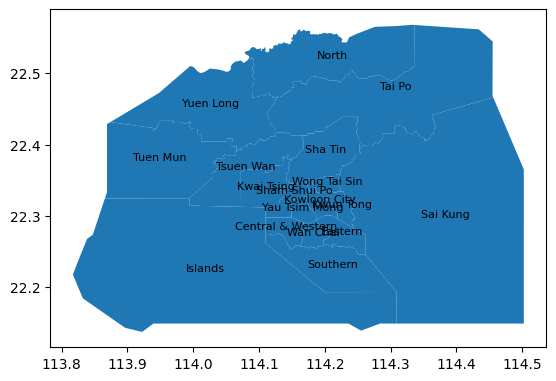

<Figure size 5000x5000 with 0 Axes>

In [43]:
# Plot the GeoDataFrame
ax = gdf.plot()

# Add labels to the plot
plt.figure(figsize=(50, 50))
for idx, row in gdf.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['neighbourhood'], fontsize=8, ha='center')
plt.show()

In [45]:

feq = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

hk = gp.read_file("/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
hk = pd.merge(hk, feq, on='neighbourhood', how='left')
hk.rename(columns={'price': 'average_price'}, inplace=True)
hk.average_price = hk.average_price.round(decimals=0)

map_dict = hk.set_index('neighbourhood')['average_price'].to_dict()
color_scale = folium.LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[22.3193, 114.1694], zoom_start=11)
folium.GeoJson(data=hk,
               name='Hong Kong',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3